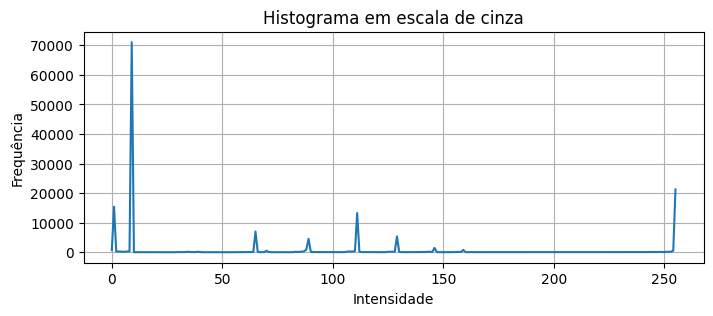

Threshold escolhido: 250


In [22]:
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt
import os


img1 = Image.open("P1.png").convert("RGBA")
img2 = Image.open("P2.png").convert("RGBA")
img3 = Image.open("P3.jpg").convert("RGBA")
img4 = Image.open("P4.png").convert("RGBA")

target_height = 500
imgs_resized = []

for img in [img1, img2, img3, img4]:
    aspect_ratio = img.width / img.height
    new_width = int(aspect_ratio * target_height)
    resized = img.resize((new_width, target_height))
    imgs_resized.append(resized)

total_width = sum(img.width for img in imgs_resized)
combined_img = Image.new("RGBA", (total_width, target_height))
x_offset = 0
for img in imgs_resized:
    combined_img.paste(img, (x_offset, 0))
    x_offset += img.width

def mudar_cores(imagem):
    arr = np.array(imagem)
    r, g, b, a = arr[..., 0], arr[..., 1], arr[..., 2], arr[..., 3]

    r_new = 255 - r
    g_new = 255 - g
    b_new = 255 - b

    arr[..., 0] = r_new
    arr[..., 1] = g_new
    arr[..., 2] = b_new
    return Image.fromarray(arr, 'RGBA')

img_colorida = mudar_cores(combined_img)


img_espelhada = ImageOps.mirror(img_colorida)


pinguim_favorito = img_espelhada.crop((400, 0, 720, target_height)) 


gray = pinguim_favorito.convert("L")  
histograma = gray.histogram()

plt.figure(figsize=(8, 3))
plt.title("Histograma em escala de cinza")
plt.xlabel("Intensidade")
plt.ylabel("Frequência")
plt.plot(histograma)
plt.grid()
plt.show()

threshold = 250 
print(f"Threshold escolhido: {threshold}")

#foi usado pois deixava tudo azul até mesmo algumas partes que eram laranjas do penguin

gray_array = np.array(gray)
colored_array = np.array(pinguim_favorito)


mask = gray_array < threshold
colored_array[mask] = [0, 0, 255, 255]  

resultado_final = Image.fromarray(colored_array, 'RGBA')
resultado_final.save("pinguim_final.png")
resultado_final.show()
